In [3]:
import cv2  # OpenCV
import matplotlib.pyplot as plt # Для визуализации
import numpy as np # библиотека работы с матрица

In [4]:
# img = cv2.imread('1661856395_j-20.jpg')
img = cv2.imread('FCXNidmja04.jpg')
print(type(img))

<class 'numpy.ndarray'>


Размеры картинки в пикселях


In [5]:
img.shape

(1080, 864, 3)

Конкретный пиксель

In [6]:
pixel_value = img[450,770]
print(pixel_value)

[174 190 203]


по умолчанию imread загружает картинку в BGR. Matplotlib по умолчанию визуализирует картку в RGB => Надо преобразовать формат

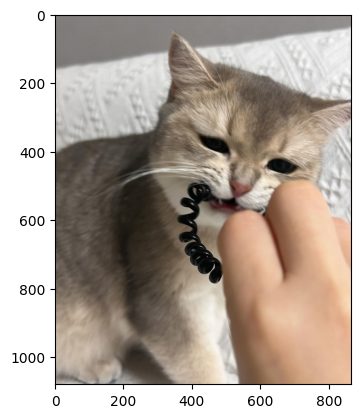

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Изображение - обычный numpy массив

In [8]:
img

array([[[129, 125, 124],
        [129, 125, 124],
        [129, 125, 124],
        ...,
        [148, 142, 142],
        [148, 142, 142],
        [148, 142, 142]],

       [[129, 125, 124],
        [129, 125, 124],
        [129, 125, 124],
        ...,
        [148, 142, 142],
        [148, 142, 142],
        [148, 142, 142]],

       [[129, 125, 124],
        [129, 125, 124],
        [129, 125, 124],
        ...,
        [148, 142, 142],
        [148, 142, 142],
        [148, 142, 142]],

       ...,

       [[192, 181, 179],
        [189, 178, 176],
        [184, 174, 172],
        ...,
        [237, 192, 159],
        [238, 193, 160],
        [237, 192, 159]],

       [[191, 180, 178],
        [187, 176, 174],
        [183, 173, 171],
        ...,
        [236, 191, 158],
        [237, 192, 159],
        [238, 193, 160]],

       [[188, 177, 175],
        [185, 174, 172],
        [182, 172, 170],
        ...,
        [236, 191, 158],
        [237, 192, 159],
        [239, 194, 161]]

#### Делаем картинку ЧБ


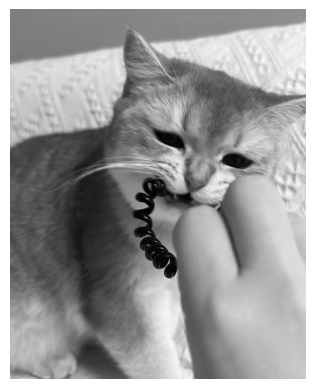

In [9]:
gray = cv2.imread('1661856395_j-20.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
gray.shape

(1080, 864)

Преобразование сущестующей картинки в ЧБ

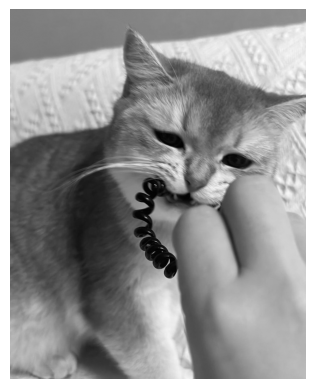

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

Сохранить картинку

In [12]:
cv2.imwrite('1661856395_j-20.jpg', gray)

True

### Базовые операции

In [13]:
img.shape

(1080, 864, 3)

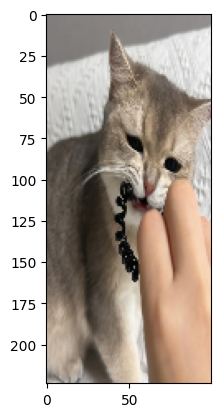

In [14]:
resize_img = cv2.resize(img, (100, 224))
plt.imshow(resize_img)
plt.show()

### Изменить размер картинки используя относительный размер <br>
Относитлеьный размер - это изменение маштаба картинки относитльно исходных пропорций <br>

---


dsize(0,0) - новый размер картинки рассчитывается автоматически исходя из коэф маштабирования


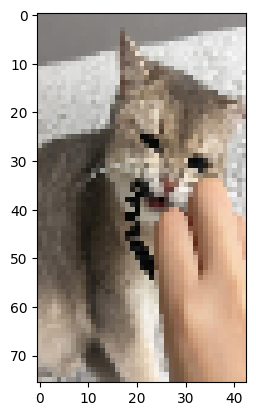

In [15]:
resized_img = cv2.resize(img, dsize=(0, 0), fx=0.05, fy=0.07)
plt.imshow(resized_img)
plt.show()

### Кадрирование


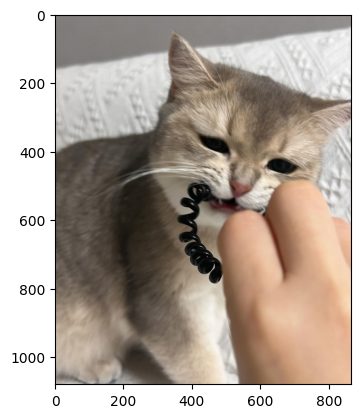

In [16]:
plt.imshow(img)
plt.show()

Если нам нужно обрезовать изображние, вспомнимаем, что это numpy массив

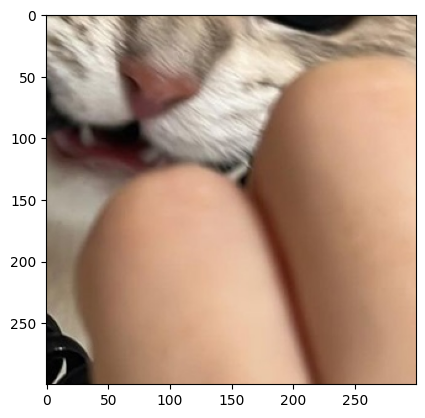

In [17]:
crop_img = img[450:750, 450:750]
plt.imshow(crop_img)
plt.show()

### Аффинные преобразования

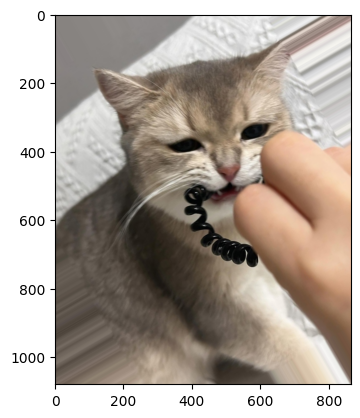

In [18]:
# Поворот - частный случай аффинного преобразования
# сначала нужно создать матрицу преобразования
mat = cv2.getRotationMatrix2D(center=(img.shape[1] // 2, img.shape[0] // 2), angle=30, scale=1)
rotated_img = cv2.warpAffine(img, mat, dsize=img.shape[1::-1], borderMode=cv2.BORDER_REPLICATE)
plt.imshow(rotated_img)
plt.show()

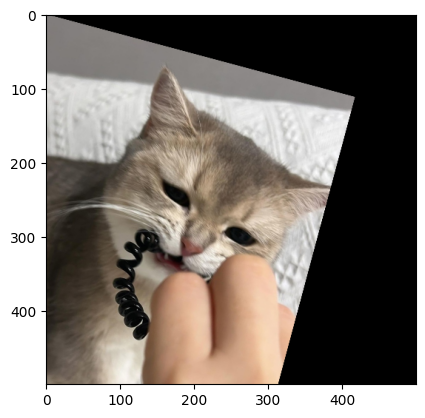

In [19]:
# Еще пример
mat = cv2.getRotationMatrix2D(center=(0, 0), angle=-15, scale=0.5)
rotated_img = cv2.warpAffine(img, mat, dsize=(500, 500))
plt.imshow(rotated_img)
plt.show()

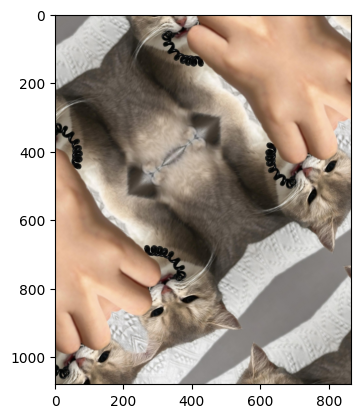

In [20]:
# Еще пример (калейдоскоп :) )
center = (0, 0)
angle = 40
scale = 0.5
dsize = img.shape[1::-1]
borderMode = cv2.BORDER_REFLECT #cv2.BORDER_CONSTANT

mat = cv2.getRotationMatrix2D(center=center, angle=angle, scale=scale)
rotated_img = cv2.warpAffine(img, mat, dsize=dsize, borderMode=borderMode)
plt.imshow(rotated_img)
plt.show()

## Свертка

Свертка - очень популярная операция при работе с изображениями. Она позволяет конструировать большое количество преобразований с разными свойствами.

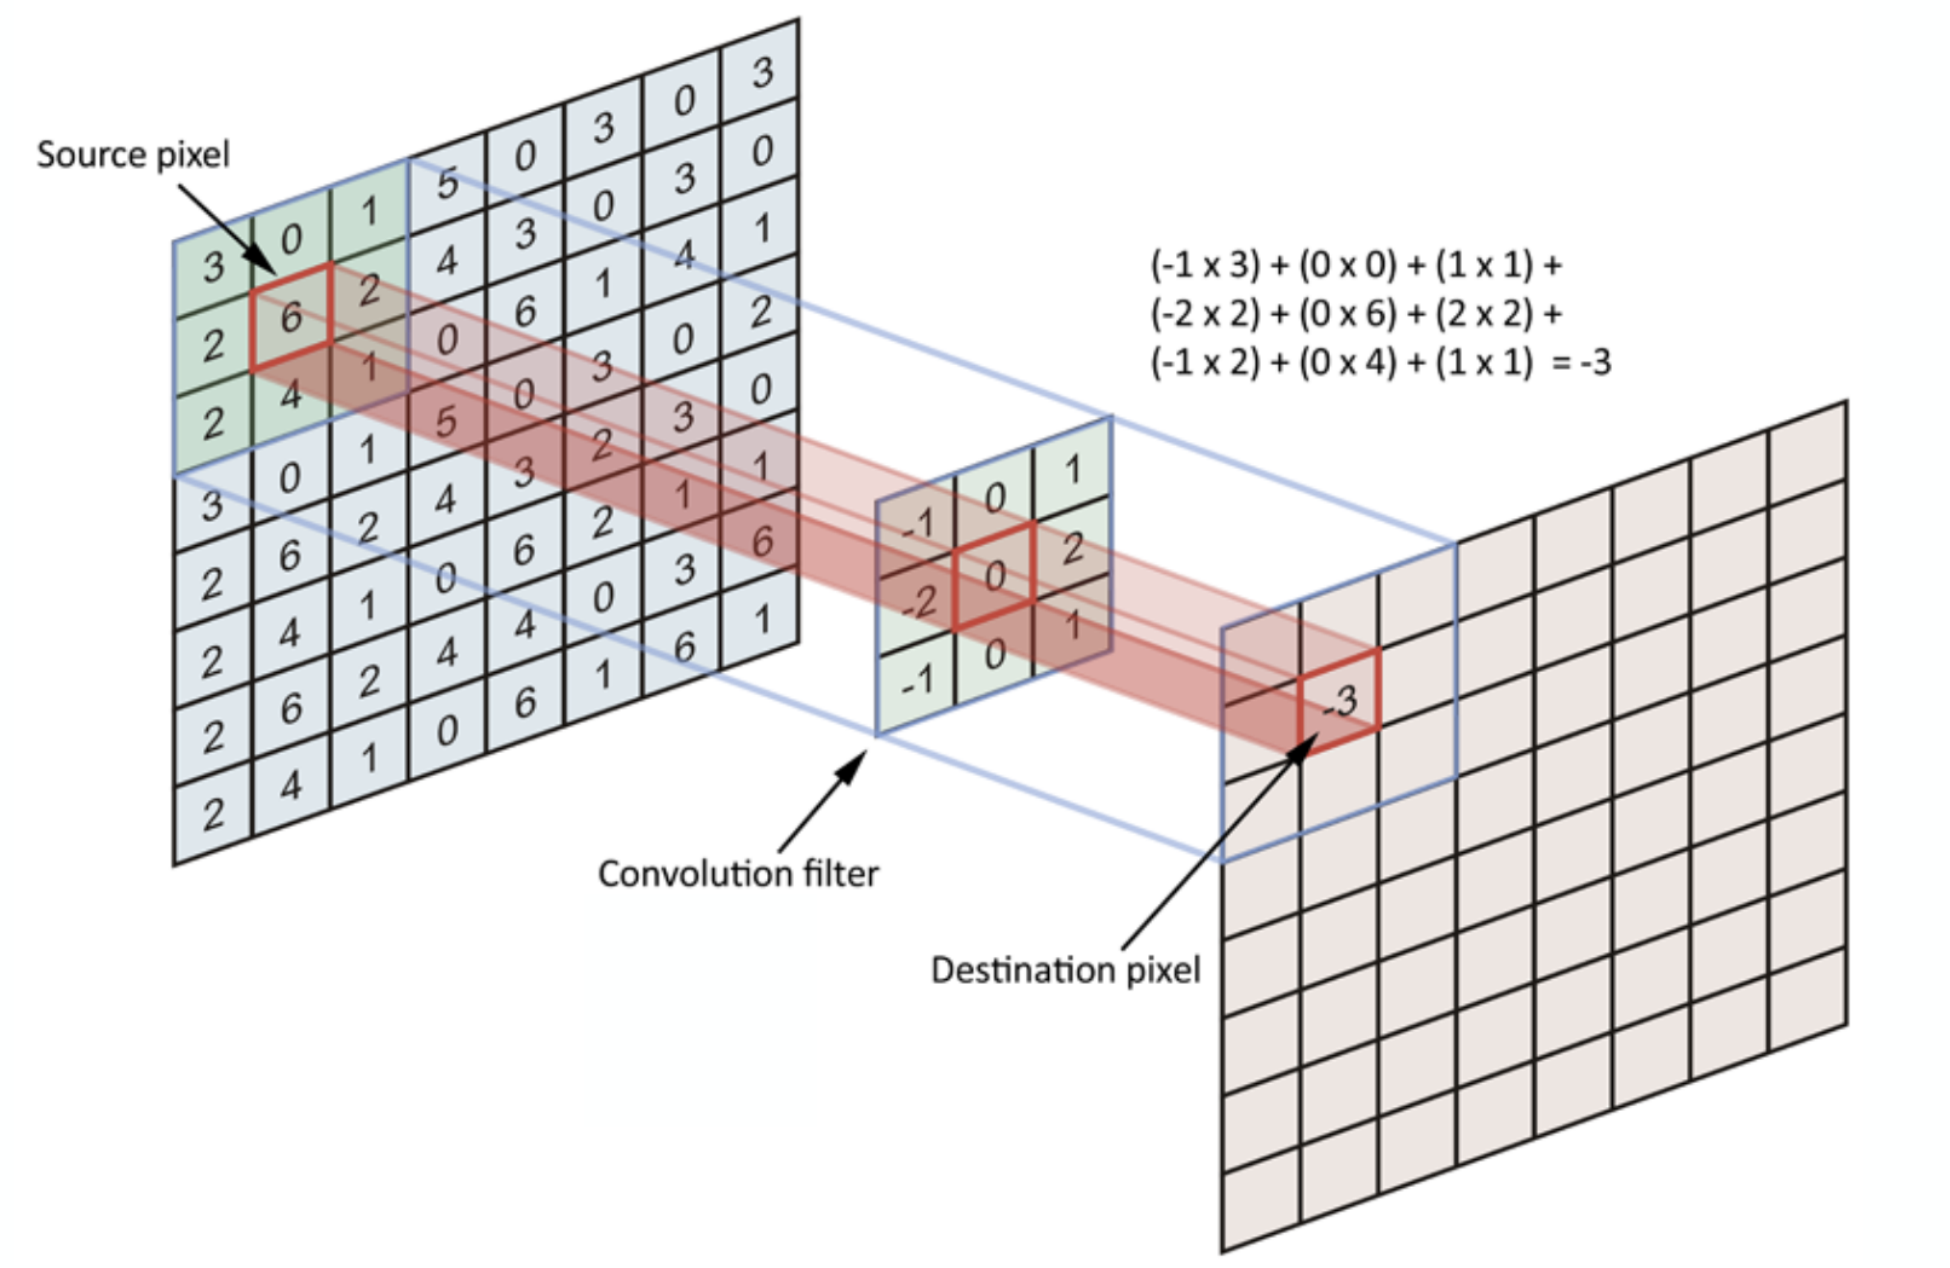

Формула свертки изображения $I$ с ядром $K$ размером ${h \times w}$:

${(I \circledast K)}_{xy} = \sum_{i=1}^h \sum_{j=1}^w K_{ij} \times I_{x+i-w//2,y+i-h//2}$

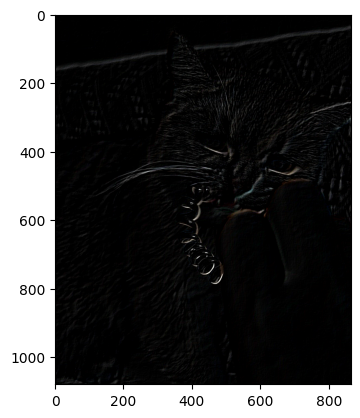

In [21]:
kernel = np.array([
    [-1, -1,  0],
    [-1,  0,  1],
    [0,  1,  1]
])
convolved_img = cv2.filter2D(img, kernel=kernel, ddepth=-1)
plt.imshow(convolved_img)

Свертка с ядром Гаусса: размытие изображения

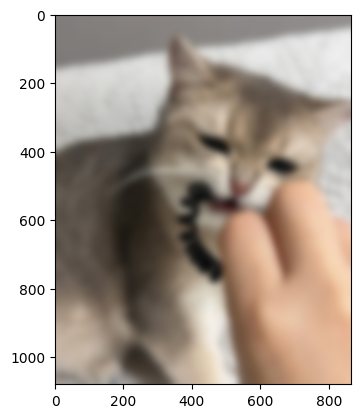

In [22]:
# Свертка с ядром Гаусса: размытие изображения
blur = cv2.GaussianBlur(img, (99, 99), 10.5)
plt.imshow(blur)
plt.show()

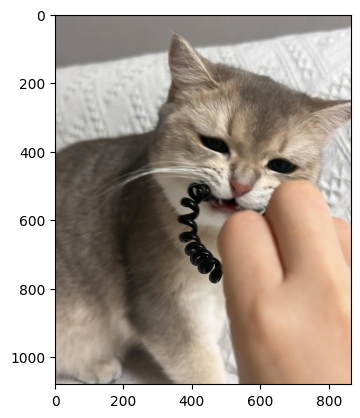

In [23]:
# Добавление шума на картинку (аддитивный гауссовский шум)
def additive_gaussian_noise(img, mean=0, sigma=0.01):
    gauss = np.clip(np.random.normal(mean, sigma, img.shape), -1, 1) * (255 // 2)
    noisy_img = img.astype(float) + gauss
    noisy_img = np.clip(np.round(noisy_img), 0, 255)
    return noisy_img.astype(np.uint8)

noisy_img = additive_gaussian_noise(img)
plt.imshow(noisy_img, vmin=0, vmax=255)
plt.show()

## Характеристики изображений


Яроксть - показатель того, насколько значения пикселей картинки блкизки к правой границе диапазона <br>
Контраст - то, насколько темные участки на картинке близки к черному, а светныле - к белому <br>
Резкость - то, насколько различимы границы объектов. Те контраст на краях <br>
Насыщенность - это интенсивность цветов

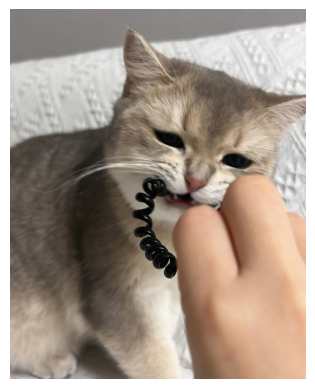

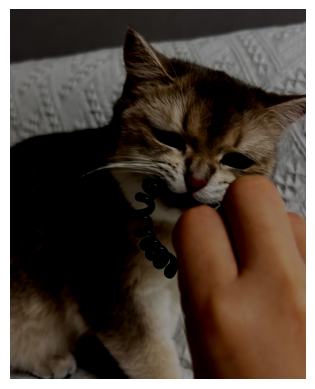

154.88914609053498 61.83553883744856


In [24]:
# Яркость можно посчитать как среднее максимальное значение среди R, G, B
plt.imshow(img, vmin=0, vmax=255)
brightness = img.max(axis=2).mean()
plt.axis('off')
plt.show()

img1 = np.clip(img.astype(int) - 100, 0, 255).astype(np.uint8)  # Прибавим 100
plt.imshow(img1, vmin=0, vmax=255)
brightness1 = img1.max(axis=2).mean()
plt.axis('off')
plt.show()
print(brightness, brightness1)

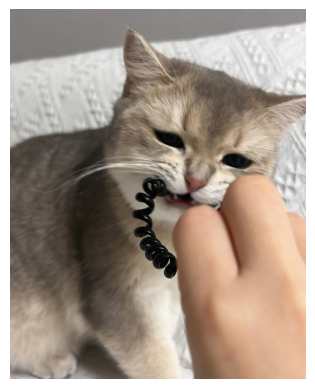

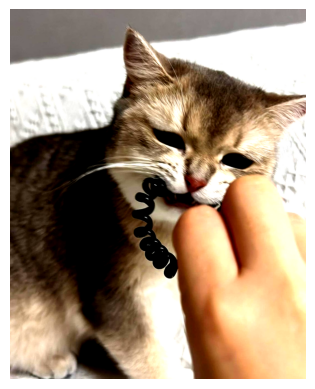

59.66220398680488 94.6803520496515


In [25]:
# Контраст: один из вариантов вычисления контраста - это стандартное  отклонение интенсивности пикселей
plt.imshow(img, vmin=0, vmax=255)
contrast = img.std().mean()
plt.axis('off')
plt.show()


mean = img.mean()
img1 = (img.astype(float) - mean) * 2 + mean  # Increase contrast
img1 = np.clip(img1, 0, 255).astype(np.uint8)
plt.imshow(img1, vmin=0, vmax=255)
contrast1 = img1.std().mean()
plt.axis('off')
plt.show()
print(contrast, contrast1)

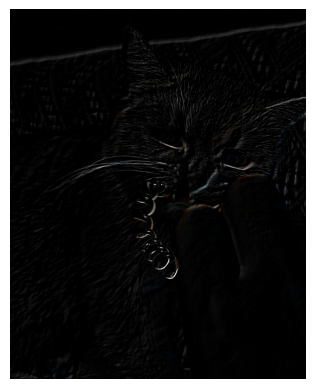

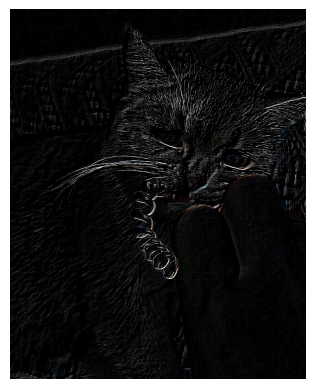

2.295511039281137 10.072607737113923


In [26]:
# Резкость - тоже можно посчитать по разным формулам.
# Одна из них - это средняя разница между сдвинутой по x (y) картинкой и исходной

def sharpness_shift_based(img):
    y_shifts = np.abs(img[: -1, :].astype(int) - img[1:, :].astype(int))
    x_shifts = np.abs(img[:, : -1].astype(int) - img[:, 1:].astype(int))
    return 0.5 * (x_shifts.mean() + y_shifts.mean())

plt.imshow(convolved_img, vmin=0, vmax=255)
sharpness = sharpness_shift_based(convolved_img)
plt.axis('off')
plt.show()

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img1 = cv2.filter2D(convolved_img, -1, kernel)
plt.imshow(img1, vmin=0, vmax=255)
sharpness1 = sharpness_shift_based(img1)
plt.axis('off')
plt.show()
print(sharpness, sharpness1)

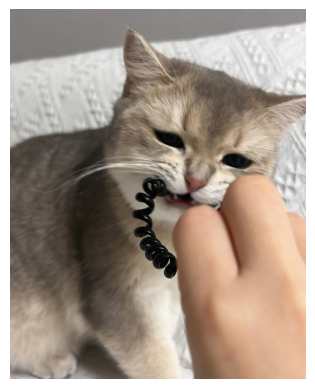

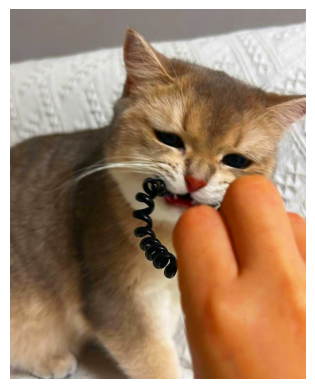

In [27]:
# Насыщенность
plt.imshow(img, vmin=0, vmax=255)
contrast = img.std().mean()
plt.axis('off')
plt.show()

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:, :, 1] = np.clip(hsv[:, :, 1].astype(int) * 2, 0, 255).astype(np.uint8)
img1 = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(img1, vmin=0, vmax=255)
plt.axis('off')
plt.show()